In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beverage-sales/synthetic_beverage_sales_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/beverage-sales/synthetic_beverage_sales_data.csv")

In [3]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [5]:
df.shape

(8999910, 11)

In [6]:
df.drop(columns=['Order_ID'], inplace=True)

In [7]:
col_obj = []
col_num = []

for col in df.columns:
    if df[col].dtype == 'object':
        col_obj.append(col)
    else:
        col_num.append(col)

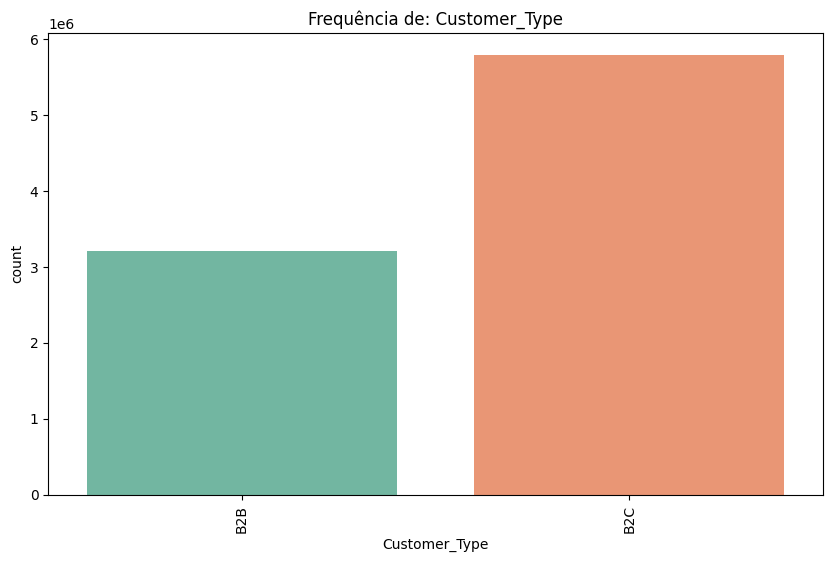

Frequência da coluna Customer_Type:
  Customer_Type  Frequência
0           B2C     5795405
1           B2B     3204505




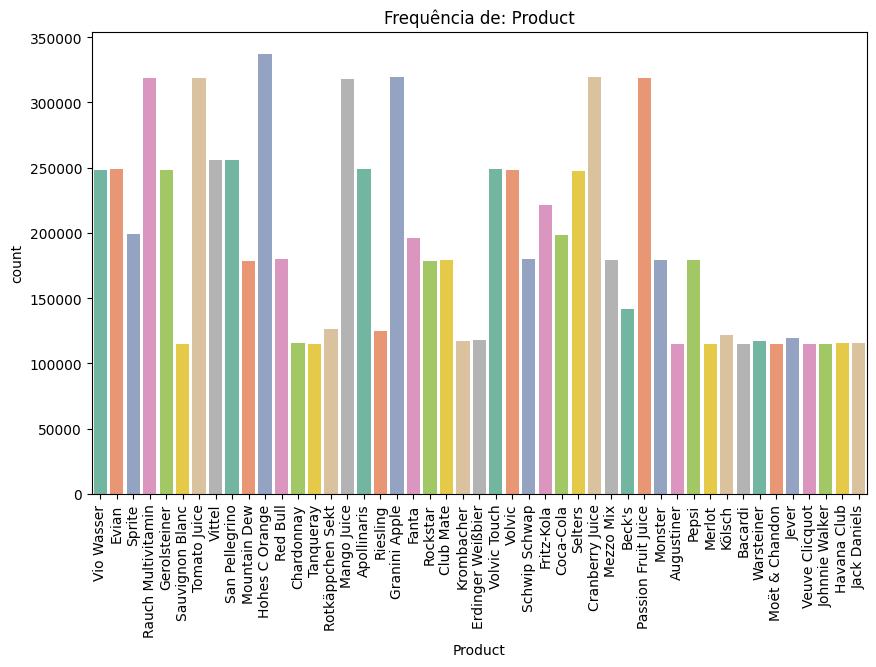

Frequência da coluna Product:
                Product  Frequência
0        Hohes C Orange      337114
1         Granini Apple      319497
2       Cranberry Juice      319328
3   Passion Fruit Juice      318923
4          Tomato Juice      318773
5    Rauch Multivitamin      318538
6           Mango Juice      317764
7        San Pellegrino      256068
8                Vittel      255790
9          Volvic Touch      248967
10                Evian      248904
11          Apollinaris      248642
12               Volvic      248469
13           Vio Wasser      248295
14         Gerolsteiner      247772
15              Selters      247310
16           Fritz-Kola      221258
17               Sprite      198847
18            Coca-Cola      198255
19                Fanta      195639
20        Schwip Schwap      179815
21             Red Bull      179748
22            Club Mate      179497
23              Monster      179462
24                Pepsi      179194
25            Mezzo Mix      17898

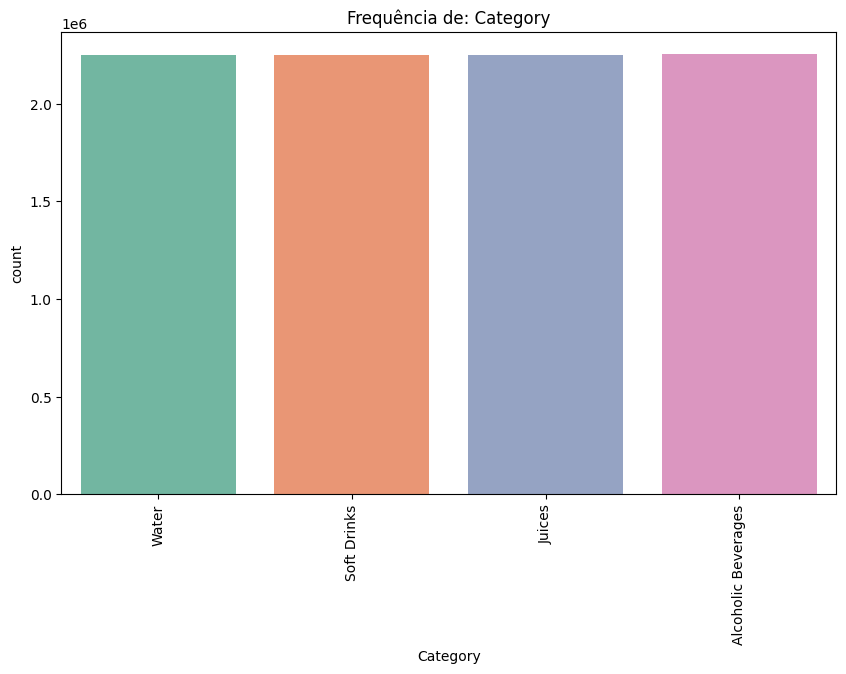

Frequência da coluna Category:
              Category  Frequência
0  Alcoholic Beverages     2251625
1                Water     2250217
2               Juices     2249937
3          Soft Drinks     2248131




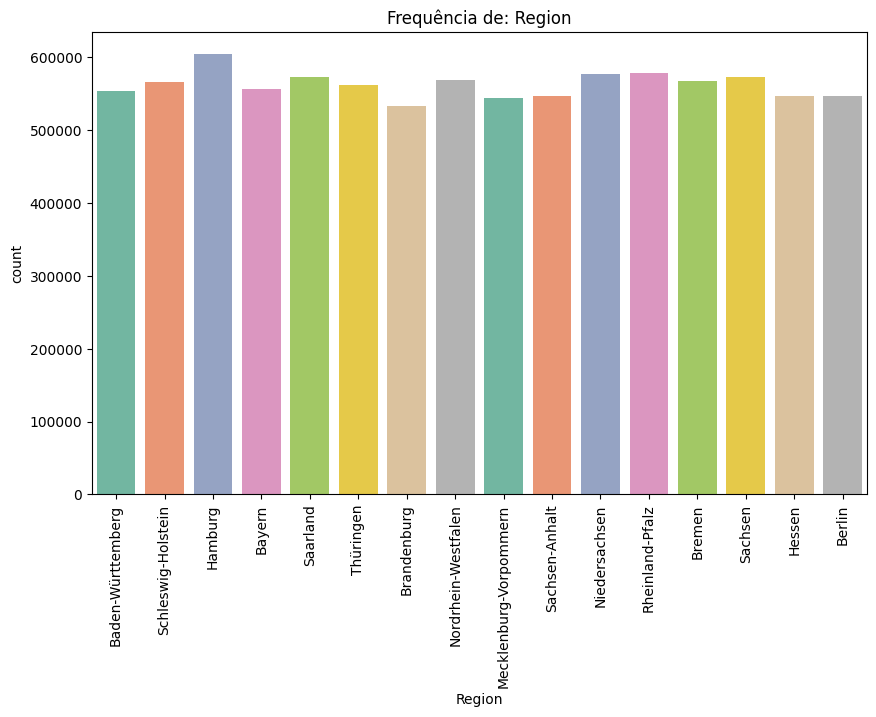

Frequência da coluna Region:
                    Region  Frequência
0                  Hamburg      604054
1          Rheinland-Pfalz      577967
2            Niedersachsen      577005
3                 Saarland      573596
4                  Sachsen      572827
5      Nordrhein-Westfalen      568797
6                   Bremen      568223
7       Schleswig-Holstein      565825
8                Thüringen      562554
9                   Bayern      556069
10       Baden-Württemberg      553505
11                  Berlin      547405
12                  Hessen      547225
13          Sachsen-Anhalt      546470
14  Mecklenburg-Vorpommern      544936
15             Brandenburg      533452




In [8]:
col_pular = [
    'Order_Date','Customer_ID'
    ]
for col in col_obj:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=df, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = df[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

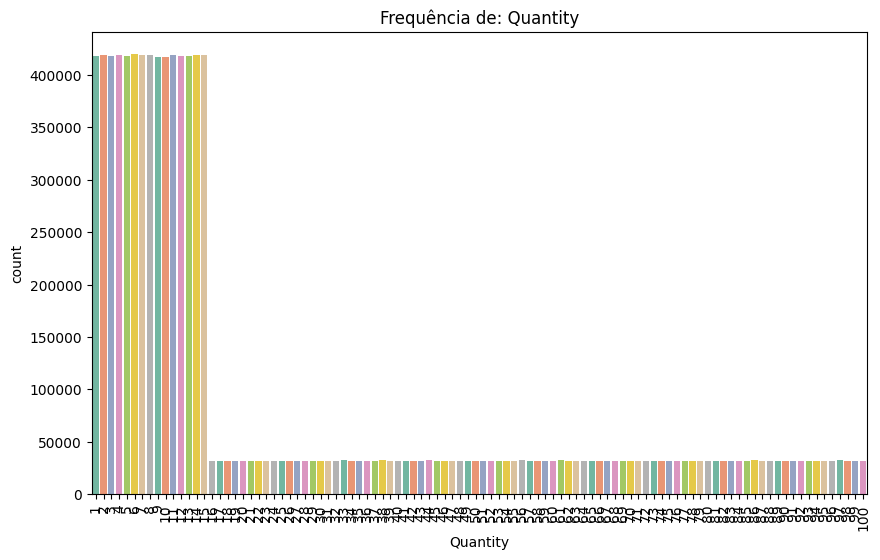

Frequência da coluna Quantity:
    Quantity  Frequência
0          6      419632
1          8      419303
2          2      418967
3         11      418793
4          7      418781
..       ...         ...
95        18       31733
96        23       31723
97        28       31646
98        96       31587
99        20       31531

[100 rows x 2 columns]




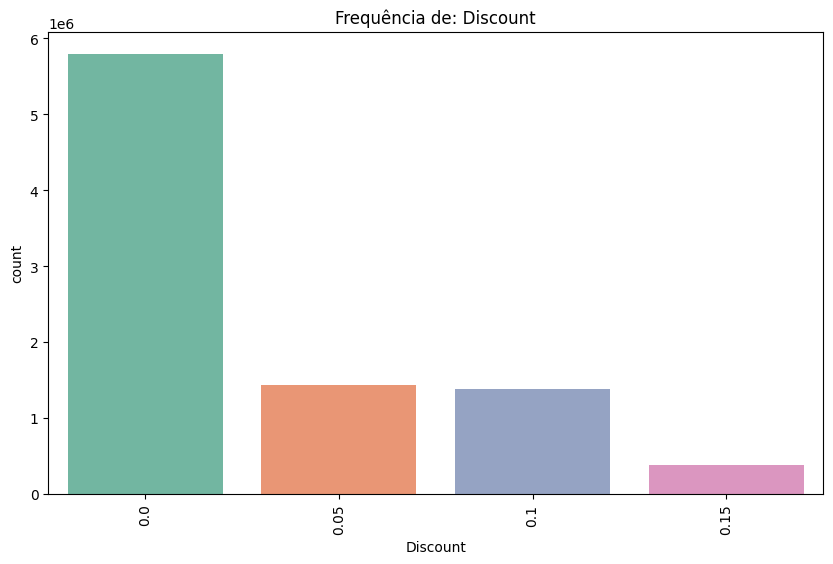

Frequência da coluna Discount:
   Discount  Frequência
0      0.00     5795405
1      0.05     1438899
2      0.10     1384589
3      0.15      381017




In [9]:
col_pular = [
    'Unit_Price','Total_Price'
    ]
for col in col_num:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=df, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = df[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

# ML

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [11]:
# Codificar variáveis categóricas
label_encoder = LabelEncoder()

categorical_columns = ['Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region', 'Order_Date']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [12]:
X = df.drop(columns=['Total_Price'])  # Remover a coluna Total_Price
y = df['Total_Price']  # A variável que queremos prever

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
xgb = XGBRegressor(n_estimators = 200)
model = xgb.fit(X_train,y_train)
model.score(X_test,y_test)

0.9954807537081328